In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import folium 
import requests
import json
from geopy.distance import geodesic


final_hdb_resale_prices = pd.read_csv("hdb_model_data_regression.csv")

In [2]:
final_hdb_resale_prices.tail()

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
77829,8,146.0,20064,30370.0,780,1182.415251,15623.76672,0,6158.429452
77830,8,142.0,20064,30370.0,766,661.035324,15234.07761,0,5859.823380
77831,8,142.0,20064,30370.0,766,661.035324,15234.07761,0,5776.556939
77832,11,146.0,20064,30370.0,768,573.471701,15246.85376,0,5743.008767
77833,5,142.0,20064,30370.0,768,573.471701,15246.85376,0,5545.101408


In [3]:
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, RidgeClassifier
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
# from mlxtend.regressor import StackingCVRegressor
# import lightgbm as lgb
# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd



# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
features = ['storey_range','floor_area_sqm','no.of bto','resale application','remaining_lease_months','Distance to nearest MRT','Distance to CBD','isMatureEstate']
X = final_hdb_resale_prices[features]
y = final_hdb_resale_prices['cpi_adjusted_price_per_sqm']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

In [7]:
scaler = StandardScaler()

In [8]:
X_train.head()

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate
30358,5,91.0,13756,26436.0,708,932.069073,15095.75605,0
59440,8,112.0,20064,30370.0,1119,1200.736904,14855.49179,0
71088,8,102.0,20064,30370.0,883,1520.261819,12713.89155,1
46493,5,125.0,13756,26436.0,802,1061.696877,12088.05824,1
77270,8,149.0,20064,30370.0,828,1750.734973,10049.92302,1


In [9]:
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [10]:
final_hdb_resale_prices

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
0,5,73.0,7314,26436.0,667,908.970521,9026.295266,1,3619.754795
1,20,70.0,7314,26436.0,1100,687.185319,9015.122154,1,6695.082857
2,2,73.0,7314,26436.0,676,586.980690,8949.443986,1,3141.673973
3,5,73.0,7314,26436.0,663,800.631299,9123.690385,1,3824.646575
4,8,68.0,7314,26436.0,708,927.322849,9734.443856,1,3226.041176
...,...,...,...,...,...,...,...,...,...
77829,8,146.0,20064,30370.0,780,1182.415251,15623.766720,0,6158.429452
77830,8,142.0,20064,30370.0,766,661.035324,15234.077610,0,5859.823380
77831,8,142.0,20064,30370.0,766,661.035324,15234.077610,0,5776.556939
77832,11,146.0,20064,30370.0,768,573.471701,15246.853760,0,5743.008767


In [11]:
#K Nearest Neighbours Regressor Model

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

knn = KNeighborsRegressor(algorithm='brute')

In [13]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='brute')

In [14]:
predictions = knn.predict(X_test)

In [15]:
#Test dataset with evaluation

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = mse ** (1/2)
print("MSE: ", mse)
print("RMSE:", rmse)

# msle
msle = metrics.mean_squared_log_error(y_test, predictions)
print("Mean Squared Log Error: ", msle)

MSE:  190723.69694543723
RMSE: 436.7192427011171
Mean Squared Log Error:  0.006338455311792908


In [17]:
r2 = metrics.r2_score(y_test, predictions).round(2)
print("Coefficient of determination test(R2): %.2f" % metrics.r2_score(y_test, predictions).round(2))
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2: ", adj_r2)

Coefficient of determination test(R2): 0.91
Adjusted R2:  0.9099537215580409


In [18]:
print(len(y_train))
print(len(predictions))

62267
15567


Text(0, 0.5, 'Predictions')

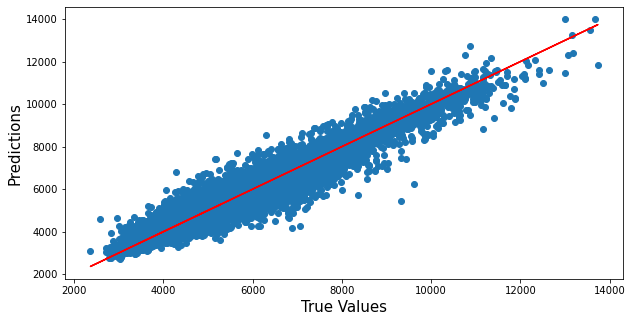

In [19]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df1 = df.head(20)
df1

,Actual,Predicted
75439,5275.212712,5302.219989
15416,3677.975410,4237.035176
24537,4813.239130,4554.712960
33177,4661.833333,4530.469412
49716,3548.411765,4142.711307
770,3572.362435,3844.389132
26407,4570.273973,4473.890226
701,5852.778261,6212.383486
55778,4876.941667,4889.609048
35288,4205.760000,3821.370711


In [21]:
#KNN finding K with RMSE

In [22]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 479.13043913266483
RMSE value for k=  2 is: 441.8194000629914
RMSE value for k=  3 is: 435.61077630308034
RMSE value for k=  4 is: 434.06665503734234
RMSE value for k=  5 is: 436.70587307677454
RMSE value for k=  6 is: 438.4104268459135
RMSE value for k=  7 is: 440.799234972167
RMSE value for k=  8 is: 443.18258216567546
RMSE value for k=  9 is: 445.9280822003239
RMSE value for k=  10 is: 448.2724463014996
RMSE value for k=  11 is: 450.3329856871859
RMSE value for k=  12 is: 451.89149246965997
RMSE value for k=  13 is: 453.26637804574545
RMSE value for k=  14 is: 455.3218943400078
RMSE value for k=  15 is: 456.8431555935731
RMSE value for k=  16 is: 458.8203753045916
RMSE value for k=  17 is: 460.50107222678207
RMSE value for k=  18 is: 462.01525289245853
RMSE value for k=  19 is: 463.1294172412608
RMSE value for k=  20 is: 464.26823996375884


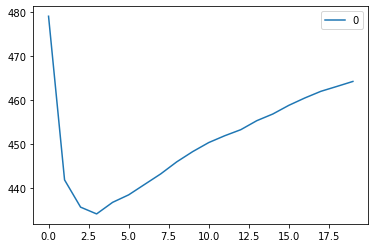

In [23]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [24]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 5}

In [25]:
pred=model.predict(X_test)
print("Coefficient of determination test(R2): %.2f" % metrics.r2_score(y_test, pred).round(2))

Coefficient of determination test(R2): 0.91


In [26]:
#Train dataset with evaluation

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

knn = KNeighborsRegressor(algorithm='brute')
knn.fit(X_train,y_train)
y_pred_train = knn.predict(X_train)  
mse = mean_squared_error(y_train, y_pred_train)
rmse = mse ** (1/2)
print("MSE: ", mse)
print("RMSE:", rmse)

# msle
msle = metrics.mean_squared_log_error(y_train, y_pred_train)
print("Mean Squared Log Error: ", msle)

MSE:  119767.68607428207
RMSE: 346.0746827987885
Mean Squared Log Error:  0.003983394409772078


In [28]:
r2 = metrics.r2_score(y_train, y_pred_train).round(2)
print("Coefficient of determination test(R2): %.2f" % metrics.r2_score(y_train, y_pred_train).round(2))
adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Adjusted R2: ", adj_r2)

Coefficient of determination test(R2): 0.94
Adjusted R2:  0.9399922901474509
